<a href="https://colab.research.google.com/github/Michwynn/Capstone-Team-Air-/blob/Machine-Learning/Split_test_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Capstone

pd.set_option('display.max_columns', None)

Mounted at /content/drive
/content/drive/My Drive/Capstone


**read dataset**

In [ ]:
df = pd.read_csv('assets/cleaned_assets/df_cleaned.csv', index_col=0)
# drop id variable
del df['id']
del df['host_since']
del df['amenities'] 
del df['latitude']
del df['longitude']
del df['Borough'] # ------------> replicate of neighbourhood_cleansed
# show all columns
df.head(5)

,total_crimes,Population per square kilometre,Property price,neighbourhood_cleansed,host_is_superhost,host_has_profile_pic,host_identity_verified,beds,property_type,room_type,accommodates,minimum_nights,maximum_nights,number_of_reviews,price,amenities_count,closest_station_dist,within_1k_station,closest_POI_dist,within_5k_POI,dist_from_center
0,38988.0,6214.914626,335683.0,Barking and Dagenham,t,t,t,1.0,Private room in rental unit,Private room,1,2,180,41,69.0,32,0.591797,1,7.895814,0,14.796863
1,38988.0,6214.914626,335683.0,Barking and Dagenham,f,t,f,1.0,Private room in rental unit,Private room,1,4,365,3,41.0,6,0.399661,2,12.688768,0,19.730923
2,38988.0,6214.914626,335683.0,Barking and Dagenham,t,t,t,2.0,Private room in home,Private room,2,3,1125,39,42.0,47,1.673583,0,9.872346,0,17.191080
3,38988.0,6214.914626,335683.0,Barking and Dagenham,f,t,t,1.0,Private room in rental unit,Private room,2,1,1125,2,48.0,8,1.264322,0,13.726785,0,20.542917
4,38988.0,6214.914626,335683.0,Barking and Dagenham,t,t,t,3.0,Private room in home,Private room,4,2,1125,259,55.0,6,0.206356,1,13.528890,0,20.511536


**create model_df by creating dummy vars and combining with numerical cols**

In [ ]:
neighbourhood_cleansed_dummy = pd.get_dummies(df["neighbourhood_cleansed"], drop_first=False)
host_has_profile_pic_dummy = pd.get_dummies(df["host_has_profile_pic"], drop_first=False).rename(columns = {'f': 'host_has_profile_pic_f', 't': 'host_has_profile_pic_t'}) 
host_identity_verified_dummy = pd.get_dummies(df["host_identity_verified"], drop_first=False).rename(columns = {'f': 'host_identity_verified_f', 't': 'host_identity_verified_t'}) 
property_type_dummy = pd.get_dummies(df["property_type"], drop_first=False)
room_type_dummy = pd.get_dummies(df["room_type"], drop_first=False)
room_type_dummy.columns = ['Entire home/apt (room type)', 'Hotel room (room type)',	'Private room (room type)',	'Shared room (room type)']

# Combining the non dummy wtih dummy variables datasets
dummy_features = pd.concat([neighbourhood_cleansed_dummy, 
                            host_has_profile_pic_dummy, 
                            host_identity_verified_dummy, 
                            property_type_dummy, 
                            room_type_dummy], axis = 1)

print("total number of dummy variables:", len(dummy_features.columns))

# Remaining features left that were not converted to dummy and for scaling
# Splitting the independent and dependent variables - standardization 
scaled_data = df[['total_crimes', 'Population per square kilometre',
                  'Property price', 'accommodates', 'minimum_nights', 'maximum_nights', 
                  'number_of_reviews', 'amenities_count', 'closest_station_dist', 'within_1k_station',
                  'closest_POI_dist', 'within_5k_POI', 'dist_from_center']]

# apply the scaling using pandas to prevent any warnings                    
scaled_data = (scaled_data - scaled_data.min()) / (scaled_data.max() - scaled_data.min())

# target variable
df_target = df[['price']]

# combine into one df for modelling use
combined_df = pd.concat([scaled_data, dummy_features], axis=1)
model_df = pd.concat([combined_df, df_target], axis=1)
# print(model_df.shape)
print("length of model df: ", len(model_df))
model_df.head(5)

total number of dummy variables: 138
length of model df:  70745


,total_crimes,Population per square kilometre,Property price,accommodates,minimum_nights,maximum_nights,number_of_reviews,amenities_count,closest_station_dist,within_1k_station,closest_POI_dist,within_5k_POI,dist_from_center,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,Barn,Boat,Camper/RV,Campsite,Casa particular,Castle,Dome,Earthen home,Entire bungalow,Entire cabin,Entire chalet,Entire condo,Entire cottage,Entire guest suite,Entire guesthouse,Entire home,Entire home/apt,Entire loft,Entire place,Entire rental unit,Entire serviced apartment,Entire townhouse,Entire vacation home,Entire villa,Floor,Houseboat,Hut,Island,Minsu,Private room,Private room in bed and breakfast,Private room in boat,Private room in bungalow,Private room in cabin,Private room in camper/rv,Private room in casa particular,Private room in chalet,Private room in condo,Private room in cottage,Private room in earthen home,Private room in farm stay,Private room in floor,Private room in guest suite,Private room in guesthouse,Private room in home,Private room in hostel,Private room in houseboat,Private room in hut,Private room in island,Private room in lighthouse,Private room in loft,Private room in minsu,Private room in nature lodge,Private room in parking space,Private room in religious building,Private room in rental unit,Private room in serviced apartment,Private room in shepherd's hut,Private room in tiny home,Private room in tipi,Private room in townhouse,Private room in treehouse,Private room in vacation home,Private room in villa,Private room in yurt,Religious building,Riad,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in rental unit,Room in serviced apartment,Shared room,Shared room in bed and breakfast,Shared room in boutique hotel,Shared room in bungalow,Shared room in bus,Shared room in condo,Shared room in farm stay,Shared room in guest suite,Shared room in guesthouse,Shared room in home,Shared room in hostel,Shared room in hotel,Shared room in loft,Shared room in rental unit,Shared room in serviced apartment,Shared room in townhouse,Shared room in vacation home,Shared room in villa,Shepherd’s hut,Tent,Tiny home,Tower,Yurt,Entire home/apt (room type),Hotel room (room type),Private room (room type),Shared room (room type),price
0,0.361925,0.268573,0.0,0.000000,0.000890,3.410462e-07,0.035013,0.301887,0.029839,0.083333,0.360264,0.0,0.506228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,69.0
1,0.361925,0.268573,0.0,0.000000,0.002669,6.935242e-07,0.002562,0.056604,0.020133,0.166667,0.579029,0.0,0.675264,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,41.0
2,0.361925,0.268573,0.0,0.066667,0.001779,2.141542e-06,0.033305,0.443396,0.084486,0.000000,0.450479,0.0,0.588251,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,42.0
3,0.361925,0.268573,0.0,0.066667,0.000000,2.141542e-06,0.001708,0.075472,0.063812,0.000000,0.626407,0.0,

**Outlier detection for price**

90% quantitle:  1570.0
q_low:  20.0
q_hi:  1570.0
No of rows removed from outlier detection:  0


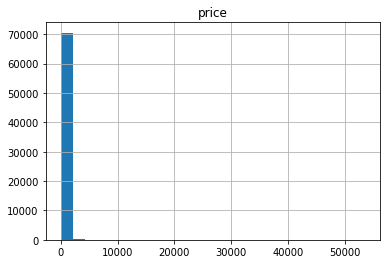

In [ ]:
# get original len
original_len = len(model_df)

# For price column, we get the threshold through 99% quantile
threshold_price = model_df["price"].quantile(0.99)
print("90% quantitle: ", threshold_price)

q_low = model_df["price"].quantile(0.01)
q_hi  = model_df["price"].quantile(0.99)

print("q_low: ", q_low)
print("q_hi: ", q_hi)
model_df.hist(column='price', bins = 25);
model_df = model_df[(model_df["price"] < q_hi) & (model_df["price"] > q_low)]
print("No of rows removed from outlier detection: ", original_len - len(df))

**Distribution analysis on whether to use log_price as target**

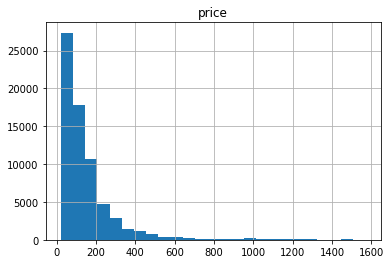

In [ ]:
model_df.hist(column='price', bins = 25);

**create log_price as target variable**

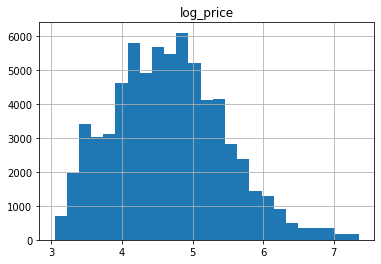

In [ ]:
model_df['log_price'] = np.log(model_df.price)
model_df.hist(column='log_price', bins = 25); # follows more of a guassian distribution

**Function for splitting**

In [ ]:
# split into train-development-testing datasets
def get_train_val_test(df, fractions, RANDOM_SEED):

  # shuffling the data:
  df = df.sample(frac = 1, random_state = RANDOM_SEED)
  # split into training, validation and testing sets
  train_df, val_df, test_df = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

  if len(train_df) + len(val_df) + len(test_df) != len(df):
    print("Check the splitting method!")
  else:
    return train_df, val_df, test_df

# 80% to 10% to 10% ratio
fractions = np.array([0.8, 0.1, 0.1])
# initialise random seed
RANDOM_SEED = 44

**Spitting...........**

In [ ]:
train_df, val_df, test_df = get_train_val_test(model_df, fractions, RANDOM_SEED)

**Write out to cleaned_assets folder**

In [ ]:
train_df.to_csv("assets/cleaned_assets/train_df.csv")
val_df.to_csv("assets/cleaned_assets/val_df.csv")
test_df.to_csv("assets/cleaned_assets/test_df.csv")